### Load Data

In [85]:
import pandas as pd
data = pd.read_csv('Enrollment_Data.csv',',')
df = pd.DataFrame(data)
titles = ['Average Income','Visit', 'Campus Visit 2','Contact Code 1', 'Date', 'Month',
         'Year','Distance','Target Enroll','Ethnicity','HScrat','ID','Init Span','Instate','Interest Rate 1',
          'Interest Rate 2','Interest', 'School Code', 'Level Year', 'Mail Qualification Score','Premiere', 
          'Referal Contacts', 'SAT Score', 'Self Initiated Contacts', 'Sex', 'Solicited Contacts',
          'Tele Counseling Qualifying','Territory', 'Total Contacts','Travel Init Contacts']
df.columns = titles
'''
Dropping unnecessary columns as follows:
'''
df = df.drop(['Campus Visit 2','Level Year','Instate','Month','Territory','School Code'],1)
df.drop_duplicates(inplace = True)                                                           ## removing duplicate rows
print('Data Size:',df.shape)
df.head()

Data Size: (5160, 24)


,Average Income,Visit,Contact Code 1,Date,Year,Distance,Target Enroll,Ethnicity,HScrat,ID,...,Mail Qualification Score,Premiere,Referal Contacts,SAT Score,Self Initiated Contacts,Sex,Solicited Contacts,Tele Counseling Qualifying,Total Contacts,Travel Init Contacts
0,NaN,0,EML,1,2012,NaN,0,NaN,0.037652,32,...,5,0,0,NaN,1,1.0,0,NaN,1,0
1,NaN,0,SAT,12,2014,NaN,0,N,0.037652,51,...,5,0,0,NaN,1,1.0,0,NaN,1,0
2,NaN,0,C01,16,2015,NaN,0,C,0.037652,120,...,5,0,0,NaN,0,1.0,1,NaN,1,0
3,NaN,0,EML,11,2015,NaN,0,NaN,0.037652,151,...,5,0,0,NaN,1,0.0,0,NaN,1,0
4,NaN,0,TFL,28,2015,NaN,0,B,0.037652,160,...,5,0,0,1090.0,2,1.0,0,NaN,2,0


### Data Cleaning

Dropped column because of many non-int inputs: Contact Code 1
Data Size: (5160, 23)


,Average Income,Visit,Date,Year,Distance,Target Enroll,Ethnicity,HScrat,ID,Init Span,...,Mail Qualification Score,Premiere,Referal Contacts,SAT Score,Self Initiated Contacts,Sex,Solicited Contacts,Tele Counseling Qualifying,Total Contacts,Travel Init Contacts
0,53494.7471,0,1,2012,318.01614,0,C,0.037652,32,48,...,5,0,0,1149.364497,1,1.0,0,2.141568,1,0
1,53494.7471,0,12,2014,318.01614,0,N,0.037652,51,31,...,5,0,0,1149.364497,1,1.0,0,2.141568,1,0
2,53494.7471,0,16,2015,318.01614,0,C,0.037652,120,20,...,5,0,0,1149.364497,0,1.0,1,2.141568,1,0
3,53494.7471,0,11,2015,318.01614,0,C,0.037652,151,18,...,5,0,0,1149.364497,1,0.0,0,2.141568,1,0
4,53494.7471,0,28,2015,318.01614,0,B,0.037652,160,18,...,5,0,0,1090.000000,2,1.0,0,2.141568,2,0


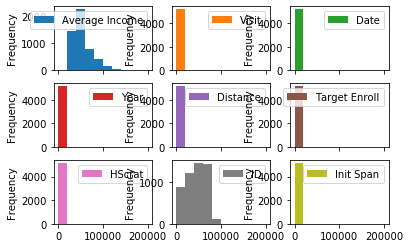

In [86]:
import numpy as np
for column in df.columns:
    if df[column].dtypes == int or df[column].dtypes == float:                        ## only dealing with numbers
        df2 = df[column]                                           ## new dataframe with each column in it       
        df2 = df2.dropna()                                     ## new dataframe with only known values
        if abs(np.mean(df2)-np.median(df2)) <= np.std(df2):   ## if to replace 'nan' with mean or median
            df[column].fillna(np.mean(df2), inplace = True)                  ## if |mean-median| <= std, replace 'nan' with mean
        else:
            df[column].fillna(np.median(df2), inplace = True)                ## if |mean-median| > std, replace 'nan' with median
          
for column in df.columns:
    if df[column].dtypes == object or df[column].dtypes == str:    ## dealing with object and str values
        df3 = df[column]                                            ## creating new dataframe for each column to compute frequency
        df3 = df3.dropna()
        list_ = list(df3.unique())                         ## listing no of unique objects in column
        if len(list_) <= 12:                    ## data for modeling will only contain columns with unique objects <= 12 
            total_count = 0
            value_ = str
            for value in list_:
                if value != 'nan':
                    count = df3.loc[df3 == value]  ## frequency of object in each column   
                    count = int(count.shape[0])
                    if count >= total_count:
                        total_count = count
                        value_ = value
            df[column].fillna(value_, inplace = True)    ## replacing 'nan' with most frequent object
        else:
            df = df.drop(column,1)                       ## getting rid of columns with more than 12 unique object values
            print('Dropped column because of many non-int inputs:',column)
print('Data Size:',df.shape)
df.iloc[:,0:10].plot.hist(subplots = True, layout = (3,3))
df.head()

### Qualitative data formatting

In [87]:
df4 = df                       ## replicating dataframe to avoid infinity loop
initial_shape = df.shape
for column in df4.columns:
    if df4[column].dtypes == object or df4[column].dtypes == str:   ## qualitative data columns
        list_ = list(df4[column].unique())  
        for value in list_:
            df[str(column)+str(value)] = None   ## creating new column with object name in parent column
            for i in range(df.shape[0]):
                if df[column][i] == value:           
                    df[str(column)+str(value)][i] = 1  ## assigning value '1' if object appear in parent column for same index
                else:
                    df[str(column)+str(value)][i] = 0  ## assigning value '0' if object do not appear in parent column for same index
        df = df.drop(column,1)                        ## dropping parent column once all objects in it has their own columns
print('Old Data Size:',initial_shape)
print('New Data Size:',df.shape)
print('Number of columns added:',df.shape[1]-initial_shape[1])
df.head()

c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Old Data Size: (5160, 23)
New Data Size: (5160, 29)
Number of columns added: 6


,Average Income,Visit,Date,Year,Distance,Target Enroll,HScrat,ID,Init Span,Interest Rate 1,...,Tele Counseling Qualifying,Total Contacts,Travel Init Contacts,EthnicityC,EthnicityN,EthnicityB,EthnicityH,EthnicityA,EthnicityO,EthnicityI
0,53494.7471,0,1,2012,318.01614,0,0.037652,32,48,0.017183,...,2.141568,1,0,1,0,0,0,0,0,0
1,53494.7471,0,12,2014,318.01614,0,0.037652,51,31,0.017183,...,2.141568,1,0,0,1,0,0,0,0,0
2,53494.7471,0,16,2015,318.01614,0,0.037652,120,20,0.017183,...,2.141568,1,0,1,0,0,0,0,0,0
3,53494.7471,0,11,2015,318.01614,0,0.037652,151,18,0.017183,...,2.141568,1,0,1,0,0,0,0,0,0
4,53494.7471,0,28,2015,318.01614,0,0.037652,160,18,0.017183,...,2.141568,2,0,0,0,1,0,0,0,0


### Normalization

In [88]:
''' Normalizing data in each column with formula: (x-mean)/(max-min)'''
import numpy as np
for column in df.columns:
    if column != 'Target Enroll':
        mean = np.mean(df[column])
        _max = np.max(df[column])
        _min = np.min(df[column])
        df[column] = pd.DataFrame(map(lambda x: abs(x - mean) / (_max - _min), df[column]))
df.head()

,Average Income,Visit,Date,Year,Distance,Target Enroll,HScrat,ID,Init Span,Interest Rate 1,...,Tele Counseling Qualifying,Total Contacts,Travel Init Contacts,EthnicityC,EthnicityN,EthnicityB,EthnicityH,EthnicityA,EthnicityO,EthnicityI
0,0.0,0.075097,0.490252,0.435110,0.0,0,0.050938,0.541756,0.099945,0.028338,...,1.480297e-16,0.127024,0.08938,0.369961,0.08876,0.083527,0.107946,0.056977,0.026744,0.006008
1,0.0,0.075097,0.123585,0.101776,0.0,0,0.050938,0.541525,0.040917,0.028338,...,1.480297e-16,0.127024,0.08938,0.630039,0.91124,0.083527,0.107946,0.056977,0.026744,0.006008
2,0.0,0.075097,0.009748,0.064890,0.0,0,0.050938,0.540687,0.002723,0.028338,...,1.480297e-16,0.127024,0.08938,0.369961,0.08876,0.083527,0.107946,0.056977,0.026744,0.006008
3,0.0,0.075097,0.156919,0.064890,0.0,0,0.050938,0.540310,0.004222,0.028338,...,1.480297e-16,0.127024,0.08938,0.369961,0.08876,0.083527,0.107946,0.056977,0.026744,0.006008
4,0.0,0.075097,0.409748,0.064890,0.0,0,0.050938,0.540201,0.004222,0.028338,...,1.480297e-16,0.089987,0.08938,0.630039,0.08876,0.916473,0.107946,0.056977,0.026744,0.006008


### Input/Output

In [89]:
y = df["Target Enroll"]                     # Y: Output value (binary output: {0,1})
x = df.drop("Target Enroll",1)              # X: Input features

### Train/Test Split

In [90]:
from sklearn.model_selection import train_test_split
test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = 0)
print('Train/Test Split ratio {}/{}'.format(int((1-test_size)*100), int(test_size*100)))
print('Number of Training Data:', x_train.shape[0])
print('Number of Test Data:',x_test.shape[0])

Train/Test Split ratio 80/20
Number of Training Data: 4128
Number of Test Data: 1032


### Frequency Plot

Text(0.8, 600, '1: 511')

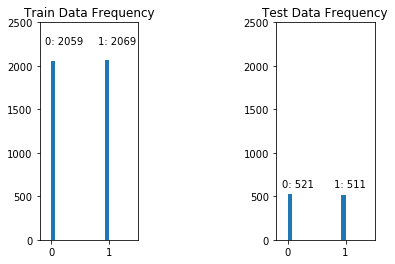

In [91]:
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
hist = plt.hist(y_train, bins = 'auto')
plt.axis((-0.2,1.5,0,2500))
plt.title('Train Data Frequency')
plt.text(-0.1,2250, str('0:')+' '+ str(y_train.loc[y_train==0].shape[0]))       ## counting no of 'zeros'
plt.text(0.8,2250, str('1:')+' '+ str(y_train.loc[y_train==1].shape[0]))        ## counting no if 'ones'

plt.subplot(1,3,3)
plt.hist(y_test, bins = 'auto')
plt.axis((-0.2,1.5,0,2500))
plt.title('Test Data Frequency')
plt.text(-0.1,600, str('0:')+' '+ str(y_test.loc[y_test==0].shape[0]))     ## zeroes 
plt.text(0.8,600, str('1:')+' '+ str(y_test.loc[y_test==1].shape[0]))       ## ones

### Models

In [92]:
models = {}           ## initializing an empty dictionary
kFolds = 5

### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

penalty = ['l1','l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]#, 1000]           
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

Hyper_Params = []
F1_Scores = []

best_score_lgr = 0
best_s_lgr = str
best_p_lgr = str
best_c_lgr = 0

'''solver = lbfgs'''

for s in range(len(solver)):
    for p in range(len(penalty)):
        for c in range(len(C)):

            if solver[s] == 'newton-cg' or 'lbfgs':
                
                '''newton-cg and lbfgs do not take penalty l2 '''
                
                if penalty[p] != 'l1':                          
                    lgr = LogisticRegression(penalty = penalty[p], C= C[c], solver = solver[s], max_iter = 100)
                    y_hat = cross_val_predict(lgr, x_train, y_train, cv = kFolds)
                    F1_score = f1_score(y_train, y_hat)
                    c_matrix = confusion_matrix(y_train, y_hat)
                    Hyper_Params.append([solver[s], penalty[p], C[c]])
                    F1_Scores.append(F1_score)
                    print('Hyper parameters: solver, penalty, C shape are:',[solver[s], penalty[p], C[c]])
                    print('F1 score is:',F1_score)
                    print('confusion matrix is:\n',c_matrix)

                    if F1_score >= best_score_lgr:                ## storing results for best validation score
                        best_score_lgr = F1_score
                        best_s_lgr = solver[s]
                        best_p_lgr = penalty[p]
                        best_c_lgr = C[c]
                        
            else:
                
                lgr = LogisticRegression(penalty = penalty[p], C= C[c], solver = solver[s], max_iter = 100)
                y_hat = cross_val_predict(lgr, x_train, y_train, cv = kFolds)
                F1_score = f1_score(y_train, y_hat)
                c_matrix = confusion_matrix(y_train, y_hat)
                Hyper_Params.append([solver[s], penalty[p], C[c]])
                F1_Scores.append(F1_score)
                
                print('Hyper parameters: solver, penalty, C shape are:',[solver[s], penalty[p], C[c]])
                print('F1 score is:',F1_score)
                print('confusion matrix is:\n',c_matrix)
                
                if F1_score >= best_score_lgr:
                    best_score_lgr = F1_score
                    best_s_lgr = solver[s]
                    best_p_lgr = penalty[p]
                    best_c_lgr = C[c]

Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 0.0001]
F1 score is: 0.7052522460262614
confusion matrix is:
 [[ 381 1678]
 [  28 2041]]
Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 0.001]
F1 score is: 0.7698519515477793
confusion matrix is:
 [[1843  216]
 [ 639 1430]]
Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 0.01]
F1 score is: 0.7654048079579995
confusion matrix is:
 [[1894  165]
 [ 684 1385]]
Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 0.1]
F1 score is: 0.786096256684492
confusion matrix is:
 [[1858  201]
 [ 599 1470]]
Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 1]
F1 score is: 0.8094141724226144
confusion matrix is:
 [[1801  258]
 [ 487 1582]]
Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 10]
F1 score is: 0.8117706747843734
confusion matrix is:
 [[1786  273]
 [ 469 1600]]
Hyper parameters: solver, penalty, C shape are: ['newton-cg', 'l2', 100]
F

c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

Hyper parameters: solver, penalty, C shape are: ['lbfgs', 'l2', 10]
F1 score is: 0.8117706747843734
confusion matrix is:
 [[1786  273]
 [ 469 1600]]


c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit

Hyper parameters: solver, penalty, C shape are: ['lbfgs', 'l2', 100]
F1 score is: 0.8131645569620253
confusion matrix is:
 [[1784  275]
 [ 463 1606]]
Hyper parameters: solver, penalty, C shape are: ['liblinear', 'l2', 0.0001]
F1 score is: 0.7015205877327866
confusion matrix is:
 [[ 328 1731]
 [  16 2053]]
Hyper parameters: solver, penalty, C shape are: ['liblinear', 'l2', 0.001]
F1 score is: 0.7251270878721858
confusion matrix is:
 [[ 617 1442]
 [  72 1997]]
Hyper parameters: solver, penalty, C shape are: ['liblinear', 'l2', 0.01]
F1 score is: 0.7871506920867067
confusion matrix is:
 [[1806  253]
 [ 562 1507]]
Hyper parameters: solver, penalty, C shape are: ['liblinear', 'l2', 0.1]
F1 score is: 0.7959830866807611
confusion matrix is:
 [[1850  209]
 [ 563 1506]]
Hyper parameters: solver, penalty, C shape are: ['liblinear', 'l2', 1]
F1 score is: 0.8091095189355169
confusion matrix is:
 [[1801  258]
 [ 488 1581]]
Hyper parameters: solver, penalty, C shape are: ['liblinear', 'l2', 10]
F1 s

c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs

Hyper parameters: solver, penalty, C shape are: ['sag', 'l2', 100]
F1 score is: 0.8134649455833965
confusion matrix is:
 [[1784  275]
 [ 462 1607]]
Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 0.0001]
F1 score is: 0.7051304197616168
confusion matrix is:
 [[ 380 1679]
 [  28 2041]]
Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 0.001]
F1 score is: 0.7695207323640281
confusion matrix is:
 [[1843  216]
 [ 640 1429]]
Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 0.01]
F1 score is: 0.7654048079579995
confusion matrix is:
 [[1894  165]
 [ 684 1385]]
Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 0.1]
F1 score is: 0.786096256684492
confusion matrix is:
 [[1858  201]
 [ 599 1470]]
Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 1]
F1 score is: 0.8094141724226144
confusion matrix is:
 [[1801  258]
 [ 487 1582]]


c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 10]
F1 score is: 0.8117706747843734
confusion matrix is:
 [[1786  273]
 [ 469 1600]]


c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Hyper parameters: solver, penalty, C shape are: ['saga', 'l2', 100]
F1 score is: 0.8131645569620253
confusion matrix is:
 [[1784  275]
 [ 463 1606]]


c:\users\stan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Best Logistic Regression Model

LGR Score: 0.8191489361702128


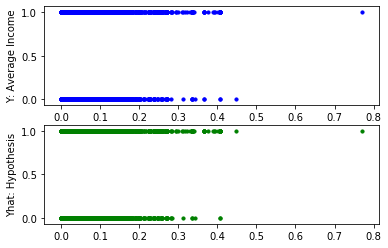

In [94]:
best_solver_lgr = LogisticRegression(penalty = best_p_lgr, C= best_c_lgr, solver = best_s_lgr, max_iter = 5000)
best_solver_lgr.fit(x_train, y_train)
yhat_train_lgr = best_solver_lgr.predict(x_train)
train_score_lgr = f1_score(y_train, yhat_train_lgr)
models['Logistic Regression'] = best_solver_lgr, train_score_lgr
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.scatter(x_train['Average Income'], y_train, color = 'b', s=10)
plt.ylabel('Y: Average Income')
plt.subplot(2,1,2)
plt.scatter(x_train['Average Income'], yhat_train_lgr, color = 'g', s=10)
plt.ylabel('Yhat: Hypothesis')
print('LGR Score:', train_score_lgr)

### Support Vector Machine

In [95]:
from sklearn import svm
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score
import numpy as np

kernels = ['rbf','sigmoid']#,'linear' ,'polynomial'] ## linear and polynomial have very high runtime
decision_function_shape = ['ovr']#,'ovo']             ## one vs one has very high runtime
kFolds = 5

hyper_params = []
F1_scores = []

scores = np.empty((len(kernels), len(decision_function_shape)))
best_score_svm = 0
best_c_matrix = None
best_k_svm = str
best_dfs_svm = str
best_val_score_svm = pd.DataFrame()

for k in range(len(kernels)):
    for dfs in range(len(decision_function_shape)):
        svc = svm.SVC(decision_function_shape = decision_function_shape[dfs], kernel = kernels[k])
        y_hat = cross_val_predict(svc, x_train, y_train, cv = kFolds)
        hyper_params.append([kernels[k], decision_function_shape[dfs]])
        c_matrix = confusion_matrix(y_train, y_hat)
        F1_score = f1_score(y_train, y_hat)
        F1_scores.append(F1_score)
        print('Hyper parameters: kernel & decision function shape are:',[kernels[k], decision_function_shape[dfs]])
        print('F1 score is:',F1_score)
        print('confusion matrix is:\n',c_matrix)
        
        if F1_score >= best_score_svm:
            best_score_svm = F1_score
            best_c_matrix = c_matrix
            best_k_svm = kernels[k]
            best_dfs_svm = decision_function_shape[dfs]

Hyper parameters: kernel & decision function shape are: ['rbf', 'ovr']
F1 score is: 0.8465185924631894
confusion matrix is:
 [[1817  242]
 [ 373 1696]]
Hyper parameters: kernel & decision function shape are: ['sigmoid', 'ovr']
F1 score is: 0.715970515970516
confusion matrix is:
 [[1515  544]
 [ 612 1457]]


### Best Support Vector Machine Model

SVM Score: 0.8623170429173903


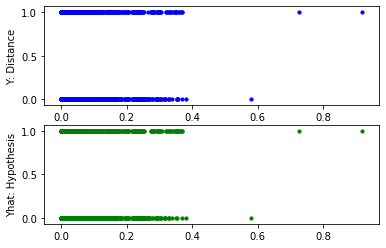

In [96]:
best_solver_svm = svm.SVC(decision_function_shape = best_dfs_svm, kernel = best_k_svm)
best_solver_svm.fit(x_train, y_train)
yhat_train_svm = best_solver_svm.predict(x_train)
train_score_svm = f1_score(y_train, yhat_train_svm)
models['Support Vector Machine'] = best_solver_svm, train_score_svm
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.scatter(x_train['Distance'], y_train, color = 'b', s=10)
plt.ylabel('Y: Distance')
plt.subplot(2,1,2)
plt.scatter(x_train['Distance'], yhat_train_svm, color = 'g', s=10)
plt.ylabel('Yhat: Hypothesis')
print('SVM Score:', train_score_svm)

### Decision Tree

In [97]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

max_depth = [4,5,6]
min_sample_split = [2,3,4,5]

hyper_params = []
F1_scores = []

best_score_dt = 0
best_depth_dt = int
best_sample_split_dt = int
best_val_score_dt = pd.DataFrame()

for d in range(len(max_depth)):
    for s in range(len(min_sample_split)): 
        dt = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = max_depth[d], min_samples_split = min_sample_split[s])
        y_hat = cross_val_predict(dt, x_train, y_train, cv = kFolds)
        hyper_params.append([max_depth[d], min_sample_split[s]])
        F1_score = f1_score(y_hat, y_train)
        F1_scores.append(F1_score)
        c_matrix = confusion_matrix(y_hat, y_train)
        
        print('Hyper parameters: max depth and min_sample_split are:',[max_depth[d], min_sample_split[s]])
        print('F1 score is:',F1_score)
        print('Confusion matrix is:\n',c_matrix)
        
        if F1_score >= best_score_dt:
            best_score_dt = F1_score
            best_depth_dt = max_depth[d]
            best_sample_split_dt = min_sample_split[s]

Hyper parameters: max depth and min_sample_split are: [4, 2]
F1 score is: 0.9081840852414419
Confusion matrix is:
 [[1720   66]
 [ 339 2003]]
Hyper parameters: max depth and min_sample_split are: [4, 3]
F1 score is: 0.908390022675737
Confusion matrix is:
 [[1721   66]
 [ 338 2003]]
Hyper parameters: max depth and min_sample_split are: [4, 4]
F1 score is: 0.9078947368421053
Confusion matrix is:
 [[1721   68]
 [ 338 2001]]
Hyper parameters: max depth and min_sample_split are: [4, 5]
F1 score is: 0.908390022675737
Confusion matrix is:
 [[1721   66]
 [ 338 2003]]
Hyper parameters: max depth and min_sample_split are: [5, 2]
F1 score is: 0.9055734684477199
Confusion matrix is:
 [[1752  103]
 [ 307 1966]]
Hyper parameters: max depth and min_sample_split are: [5, 3]
F1 score is: 0.9037618278329103
Confusion matrix is:
 [[1753  111]
 [ 306 1958]]
Hyper parameters: max depth and min_sample_split are: [5, 4]
F1 score is: 0.9055299539170507
Confusion matrix is:
 [[1753  104]
 [ 306 1965]]
Hyper pa

### Best Decision Tree Model

DT Score: 0.9266247379454927


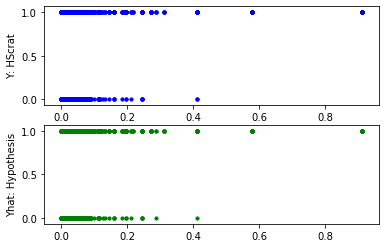

In [98]:
best_solver_dt = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = best_depth_dt, min_samples_split = best_sample_split_dt)
best_solver_dt.fit(x_train, y_train)
yhat_train_dt = best_solver_dt.predict(x_train)
train_score_dt = f1_score(y_train, yhat_train_dt)
models['Decision Tree'] = best_solver_dt, train_score_dt
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.scatter(x_train['HScrat'], y_train, color = 'b', s=10)
plt.ylabel('Y: HScrat')
plt.subplot(2,1,2)
plt.scatter(x_train['HScrat'], yhat_train_dt, color = 'g', s=10)
plt.ylabel('Yhat: Hypothesis')
print('DT Score:', train_score_dt)

### Plot Decision Tree

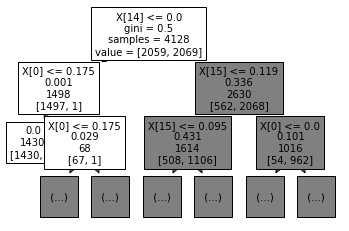

In [99]:
from sklearn.tree import plot_tree
plt_tree = plot_tree(best_solver_dt, max_depth = 2, label = 'root', fontsize = 10)

### Random Forest Model

In [100]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, f1_score
import numpy as np

max_depth = [4, 8 , 10]#, 12]                   ## max depth range
n_estimators = [10, 50, 100]#, 150, 200]#, 500, 1000] ## high runtime   ## max number of trees

F1_Scores = []
Hyper_Params = []

best_score_rf = 0
best_depth_rf = int
best_num_of_tree_rf = int

for ntree in range(len(n_estimators)):
    for d in range(len(max_depth)):
        rf = ensemble.RandomForestClassifier(n_estimators = n_estimators[ntree], max_depth = max_depth[d])
        y_hat = cross_val_predict(rf, x_train, y_train, cv = 5)
        F1_score = f1_score(y_train, y_hat)
        F1_scores.append(F1_score)
        c_matrix = confusion_matrix(y_train, y_hat)
        Hyper_Params.append([n_estimators[ntree], max_depth[d]])
        print('Hyper parameters: n estimator, max depth are:',[n_estimators[ntree], max_depth[d]])
        print('F1 score is:', F1_score)
        print('Confusion matrix is:\n', c_matrix)
        
        if F1_score >= best_score_rf:
            best_score_rf = F1_score
            best_depth_rf = max_depth[d]
            best_num_of_tree_rf = n_estimators[ntree]

Hyper parameters: n estimator, max depth are: [10, 4]
F1 score is: 0.9020044543429844
Confusion matrix is:
 [[1663  396]
 [  44 2025]]
Hyper parameters: n estimator, max depth are: [10, 8]
F1 score is: 0.9235757295044003
Confusion matrix is:
 [[1804  255]
 [  75 1994]]
Hyper parameters: n estimator, max depth are: [10, 10]
F1 score is: 0.9303724265556327
Confusion matrix is:
 [[1816  243]
 [  58 2011]]
Hyper parameters: n estimator, max depth are: [50, 4]
F1 score is: 0.9169853768278965
Confusion matrix is:
 [[1721  338]
 [  31 2038]]
Hyper parameters: n estimator, max depth are: [50, 8]
F1 score is: 0.9270642201834862
Confusion matrix is:
 [[1789  270]
 [  48 2021]]
Hyper parameters: n estimator, max depth are: [50, 10]
F1 score is: 0.9328099746017087
Confusion matrix is:
 [[1817  242]
 [  49 2020]]
Hyper parameters: n estimator, max depth are: [100, 4]
F1 score is: 0.9181591475855815
Confusion matrix is:
 [[1742  317]
 [  44 2025]]
Hyper parameters: n estimator, max depth are: [100, 

### Best Random Forest Model

RF Score: 0.9618534987128482


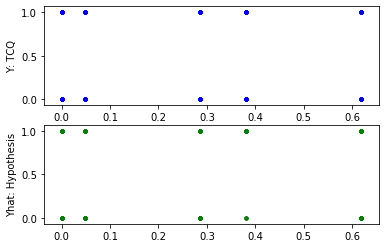

In [101]:
best_solver_rf = ensemble.RandomForestClassifier(n_estimators = best_num_of_tree_rf, max_depth = best_depth_rf)
best_solver_rf.fit(x_train, y_train)
yhat_train_rf = best_solver_rf.predict(x_train)
train_score_rf = f1_score(y_train, yhat_train_rf)
models['Random Forest'] = best_solver_rf, train_score_rf
plt.subplot(2,1,1)
plt.scatter(x_train['Tele Counseling Qualifying'], y_train, color = 'b', s=10)
plt.ylabel('Y: TCQ')
plt.subplot(2,1,2)
plt.scatter(x_train['Tele Counseling Qualifying'], yhat_train_rf, color = 'g', s=10)
plt.ylabel('Yhat: Hypothesis')
print('RF Score:', train_score_rf)

### Gradient Boosting Model

GB Score: 0.9536733738886289


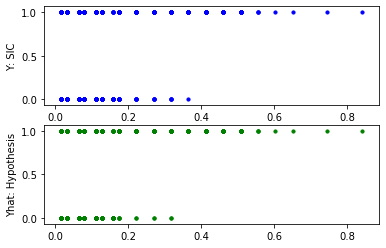

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np

kFold = 5
best_score_gb = 0

gbc = GradientBoostingClassifier()
y_hat = cross_val_predict(gbc, x_train, y_train, cv = kFold)
F1_score = f1_score(y_train, y_hat)
c_matrix = confusion_matrix(y_train, y_hat)
best_solver_gb = gbc
best_score_gb = F1_score

best_solver_gb.fit(x_train, y_train)
yhat_train_gb = best_solver_gb.predict(x_train)
train_score_gb = f1_score(y_train, yhat_train_gb)
models['Gradient Boosting'] = best_solver_gb, train_score_gb
plt.subplot(2,1,1)
plt.scatter(x_train['Self Initiated Contacts'], y_train, color = 'b',s=10)
plt.ylabel('Y: SIC')
plt.subplot(2,1,2)
plt.scatter(x_train['Self Initiated Contacts'], yhat_train_gb, color = 'g',s=10)
plt.ylabel('Yhat: Hypothesis')
print('GB Score:', train_score_gb)

### All Solvers

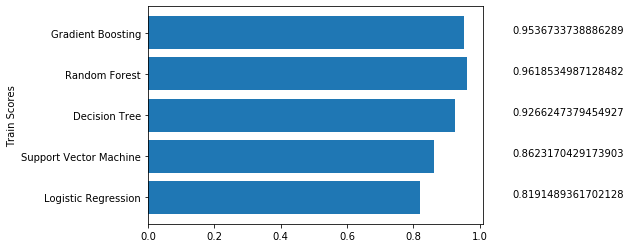

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes

all_solvers = []
train_scores = []
model_names = []

import matplotlib.pyplot as plt
for key in models.keys():
    model_names.append(key)
    all_solvers.append(models[key][0])
    train_scores.append(models[key][1])

plt.barh(model_names, train_scores)
plt.ylabel('Train Scores')
for index, value in enumerate(train_scores):
    plt.text(1.1, index, str(value))

### Test scores and reports

Classification report for Logistic Regression
Test Scores for Logistic Regression is: 0.8305785123966942
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       521
           1       0.88      0.79      0.83       511

    accuracy                           0.84      1032
   macro avg       0.85      0.84      0.84      1032
weighted avg       0.84      0.84      0.84      1032

Classification report for Support Vector Machine
Test Scores for Support Vector Machine is: 0.863453815261044
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       521
           1       0.89      0.84      0.86       511

    accuracy                           0.87      1032
   macro avg       0.87      0.87      0.87      1032
weighted avg       0.87      0.87      0.87      1032

Classification report for Decision Tree
Test Scores for Decision Tree is: 0.9161168708765315
              precision    recall  f1-

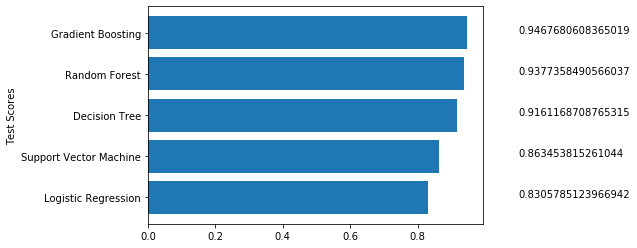

In [104]:
test_scores = []
yhat_test = []
for i in range(len(all_solvers)):
    yhat_test.append(all_solvers[i].predict(x_test))
    test_scores.append(f1_score(y_test, all_solvers[i].predict(x_test)))
    print('Classification report for {}'.format(model_names[i]))
    print('Test Scores for {} is:'.format(model_names[i]),f1_score(y_test, all_solvers[i].predict(x_test)))
    print(classification_report(y_test, all_solvers[i].predict(x_test)))
plt.barh(model_names, test_scores)
plt.ylabel('Test Scores')
for index, value in enumerate(test_scores):
    plt.text(1.1, index, str(value))

### Best Model and Solver

In [105]:
best_test_score = np.max(test_scores)
pos_best = np.argmax(test_scores)
print('Best Model is:',model_names[pos_best])
print('Test score for {} is:'.format(model_names[pos_best]),test_scores[pos_best])
print('Solver for {} is:'.format(model_names[pos_best]),all_solvers[pos_best])   

Best Model is: Gradient Boosting
Test score for Gradient Boosting is: 0.9467680608365019
Solver for Gradient Boosting is: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Confusion Metrices

Logistic Regression
Support Vector Machine
Decision Tree
Random Forest
Gradient Boosting


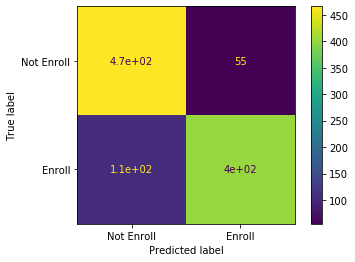

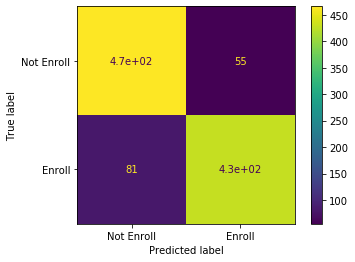

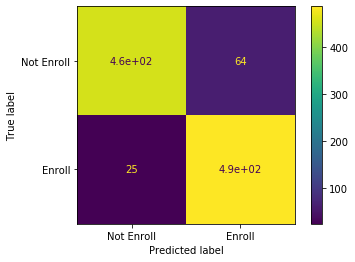

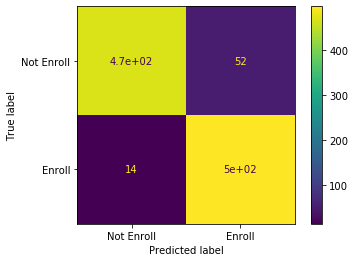

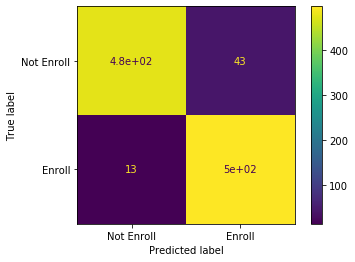

In [106]:
from sklearn.metrics import plot_confusion_matrix
label_names = ['Not Enroll', 'Enroll']
for i in range(len(all_solvers)):
    print(model_names[i])
    plot_confusion_matrix(all_solvers[i], x_test, y_test, display_labels=label_names)

### KFold for best model

In [107]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score


SCORES = []
Solver = None
BestScore = 0
BestKFold = 0

for i in range(8):    
    skf = StratifiedKFold(n_splits = i+2)
    for train_index, test_index in skf.split(x_train, y_train):
        X_train, X_test = x_train.iloc[train_index], x_train.iloc[test_index]
        Y_train, Y_test = y_train.iloc[train_index], y_train.iloc[test_index]
        GB = GradientBoostingClassifier()
        GB.fit(X_train, Y_train)
        YHat = GB.predict(X_test)
        Score = f1_score(Y_test, YHat)
        SCORES.append(Score)

        if Score>= BestScore:
            BestScore = Score
            Solver = GB
            BestKFold = i

In [108]:
BestKFold

6